In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:


csv_path="Transformed_data/EDA.csv"

df=pd.read_csv(csv_path)

In [37]:
df.head()

,Country,Managed_By,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,Product_Group,Sub_Classification,Vendor,Brand,Dosage_Form,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,First_Line_Designation,Line_Item_Insurance_(USD),Freight_Cost_USD_Clean,Weight_Kilograms_Clean,Manufacturing_Location
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV,Others,Others,Test kit,30,19,551.0,29.00,0.97,Yes,47.04,780.34,13.0,Others
1,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,Generic,Oral,240,1000,6200.0,6.20,0.03,Yes,47.04,4521.50,358.0,India
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV,Others,Determine,Test kit,100,500,40000.0,80.00,0.80,Yes,47.04,1653.78,171.0,Others
3,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Others,Generic,Tablet,60,31920,127360.8,3.99,0.07,Yes,47.04,16007.06,1855.0,India
4,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,Generic,Capsule,60,38000,121600.0,3.20,0.05,Yes,47.04,45450.08,7590.0,India


In [38]:
def separate_numerical_categorical_columns(df):
    """
    Separate numerical and categorical columns from the DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_columns: list of numerical column names
    - categorical_columns: list of categorical column names
    """
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    return numerical_columns, categorical_columns

numerical_columns, categorical_columns=separate_numerical_categorical_columns(df=df)

In [39]:
df[numerical_columns]

,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Line_Item_Insurance_(USD),Freight_Cost_USD_Clean,Weight_Kilograms_Clean
0,30,19,551.00,29.00,0.97,47.04,780.34,13.0
1,240,1000,6200.00,6.20,0.03,47.04,4521.50,358.0
2,100,500,40000.00,80.00,0.80,47.04,1653.78,171.0
3,60,31920,127360.80,3.99,0.07,47.04,16007.06,1855.0
4,60,38000,121600.00,3.20,0.05,47.04,45450.08,7590.0
...,...,...,...,...,...,...,...,...
8488,60,15000,97800.00,6.52,0.11,115.11,3410.00,1547.0
8489,30,6724,20978.88,3.12,0.10,24.69,47281.56,6183.0
8490,60,205243,738874.80,3.60,0.06,869.66,46111.55,25880.0
8491,60,166571,599655.60,3.60,0.06,705.79,46111.55,25880.0


#### Q Q plot

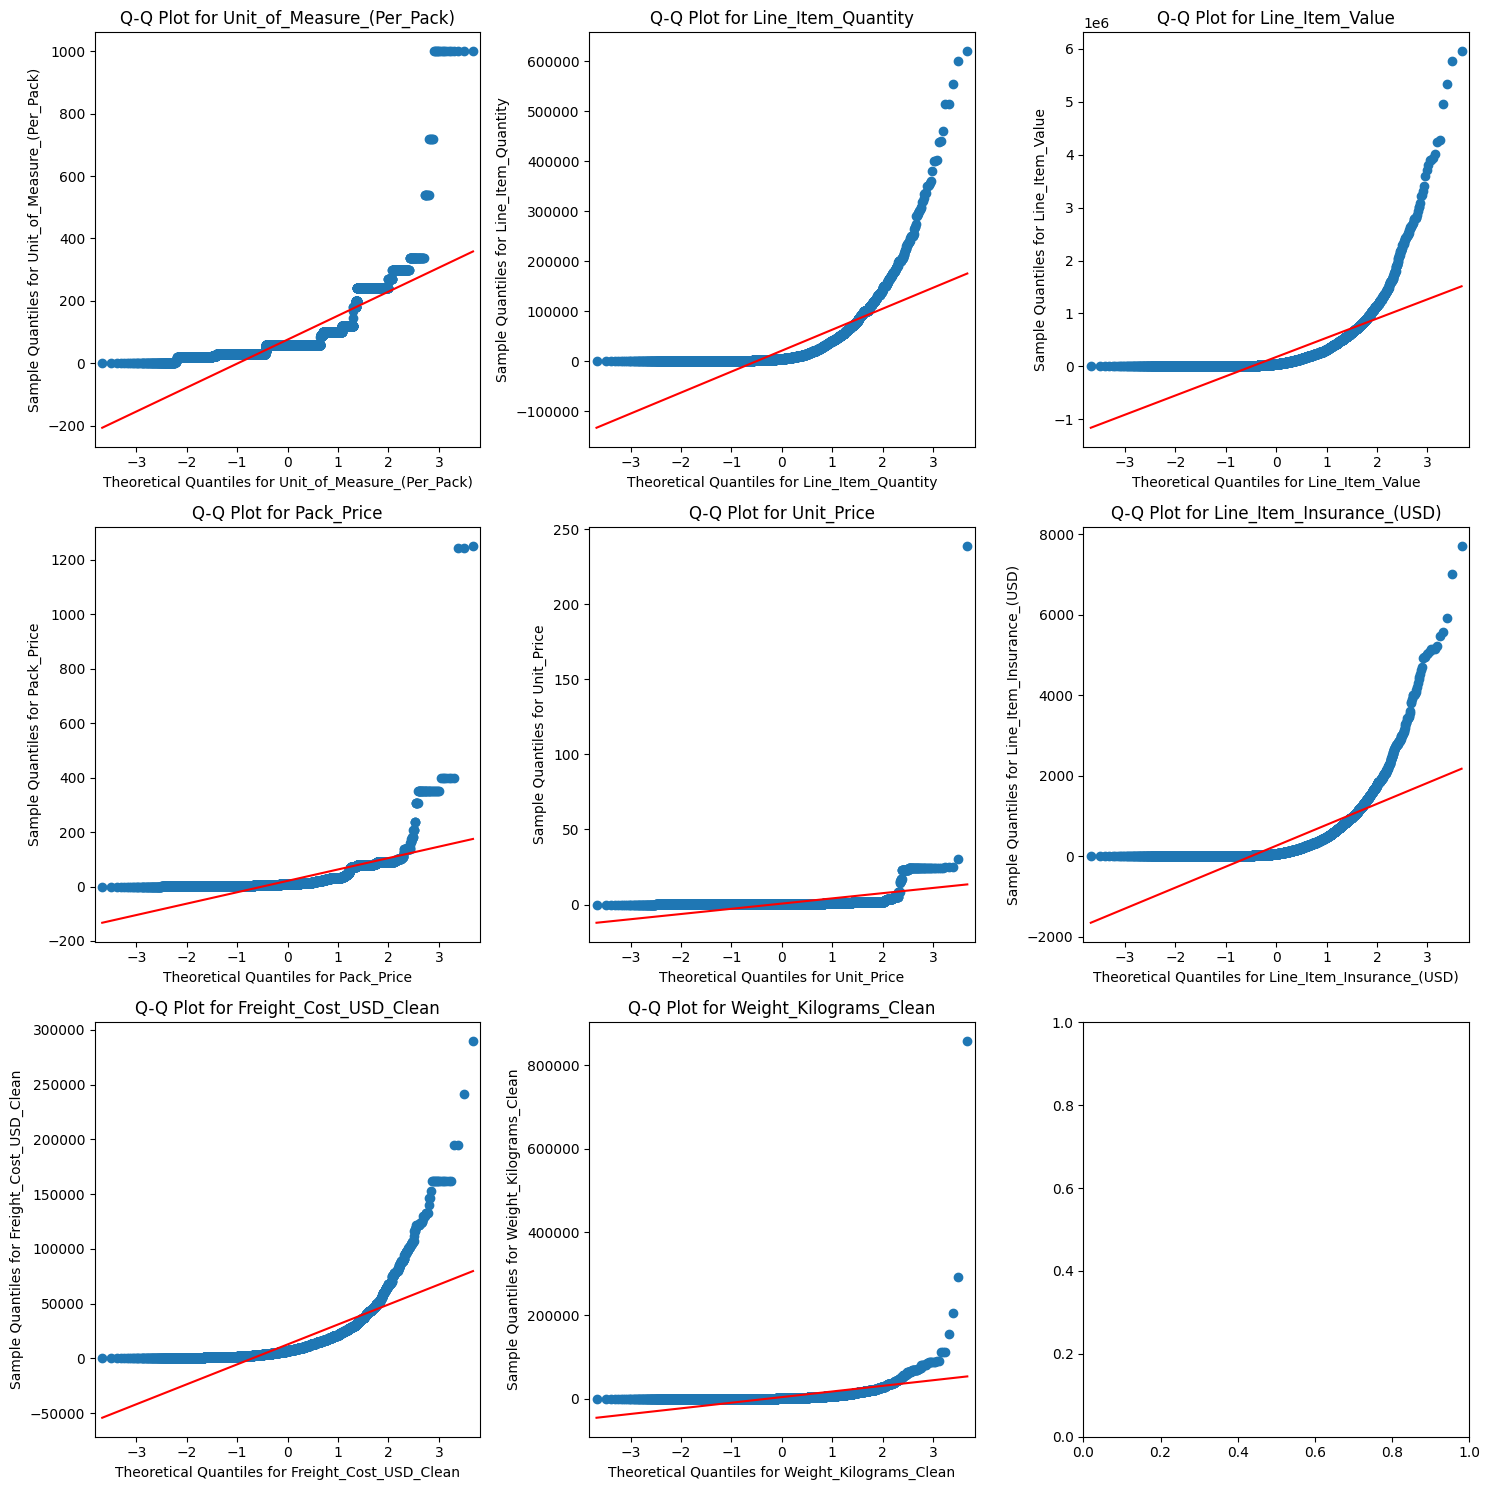

In [40]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

plot_qq_plots(dataframe=df, column_labels=numerical_columns)

In [41]:
for column in categorical_columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'Country' has 10 unique values.
Column 'Managed_By' has 2 unique values.
Column 'Fulfill_Via' has 2 unique values.
Column 'Vendor_INCO_Term' has 8 unique values.
Column 'Shipment_Mode' has 4 unique values.
Column 'Product_Group' has 5 unique values.
Column 'Sub_Classification' has 5 unique values.
Column 'Vendor' has 8 unique values.
Column 'Brand' has 4 unique values.
Column 'Dosage_Form' has 5 unique values.
Column 'First_Line_Designation' has 2 unique values.
Column 'Manufacturing_Location' has 9 unique values.


In [42]:
def one_hot_encode_and_drop(df, categorical_columns):
    """
    One-hot encode categorical columns in a DataFrame using pd.get_dummies
    and drop the original columns.

    Parameters:
    - df: pandas DataFrame
    - categorical_columns: list of column names to be one-hot encoded

    Returns:
    - encoded_df: pandas DataFrame with one-hot encoded columns
    """
    # Check if there are any missing categories in the test set
    missing_categories = set(categorical_columns) - set(df.columns)
    
    if missing_categories:
        # Add missing columns to the test set with all zeros
        for category in missing_categories:
            df[category] = 0
    
    # One-hot encode the columns
    encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    
    # Convert boolean values to 0s and 1s
    encoded_df = encoded_df.astype(int)
    
    return encoded_df



df = one_hot_encode_and_drop(df, categorical_columns=categorical_columns)

In [43]:
def boxcox_transform(df, column_list):
    """
    Apply Box-Cox transformation to specified columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column_list: list of column names to be transformed

    Returns:
    - transformed_df: pandas DataFrame with Box-Cox transformed columns
    - lambda_values: dictionary containing lambda values for each transformed column
    """
    transformed_df = df.copy()
    lambda_values = {}

    for column in column_list:
        # Adding 1 to handle zero values
        transformed_data, lambda_value = boxcox(df[column] + 1)
        transformed_df[column] = transformed_data
        lambda_values[column] = lambda_value

        # Plot the original and transformed data
        plt.figure(figsize=(12, 6))

        # Original data histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Original {column}')

        # Transformed data histogram
        plt.subplot(1, 2, 2)
        sns.histplot(transformed_data, kde=True)
        plt.title(f'Box-Cox Transformed {column}')

        plt.show()

    return transformed_df, lambda_values


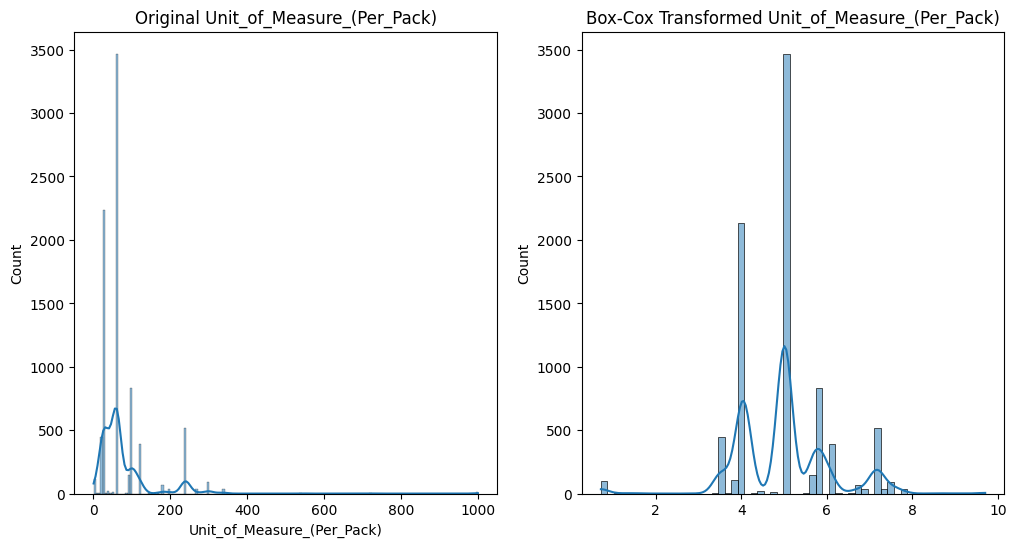

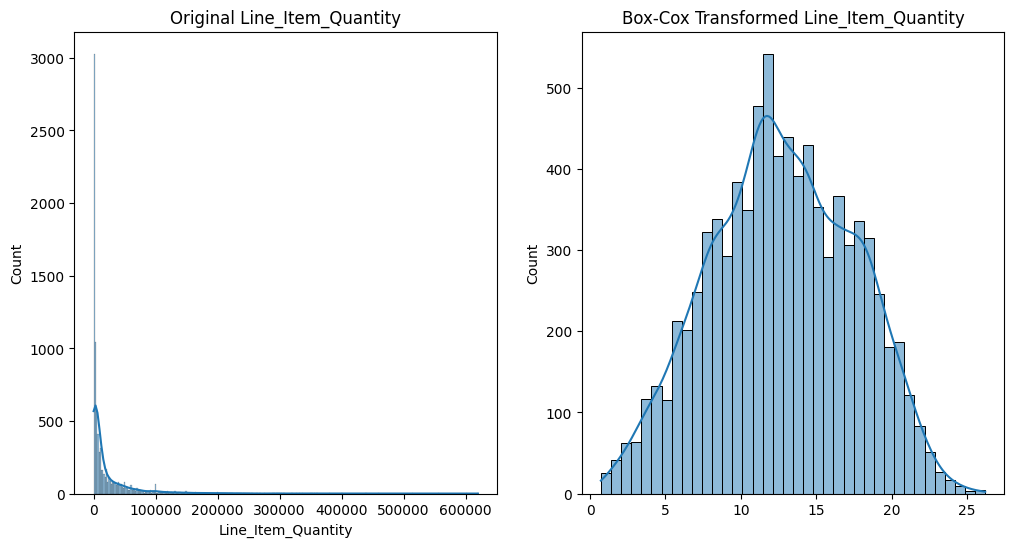

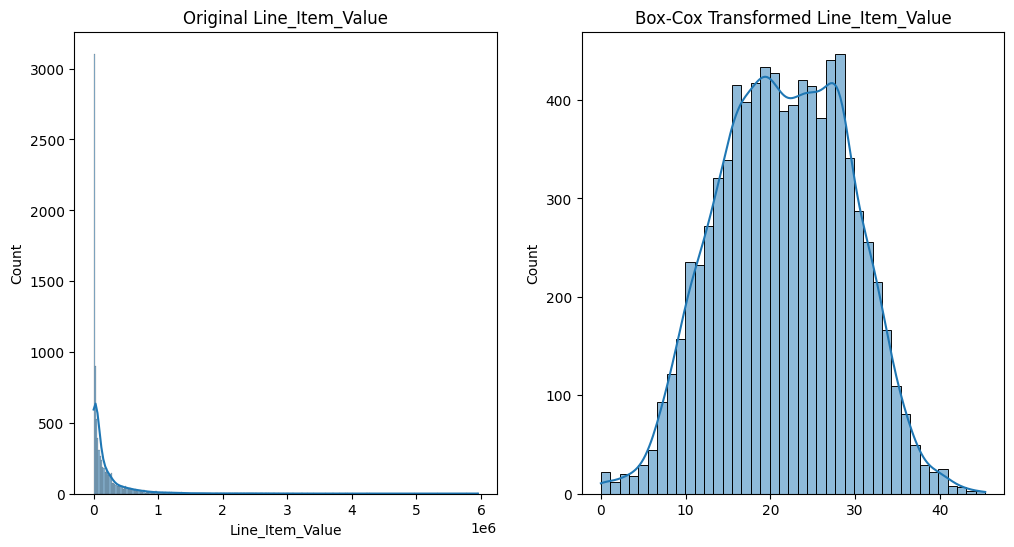

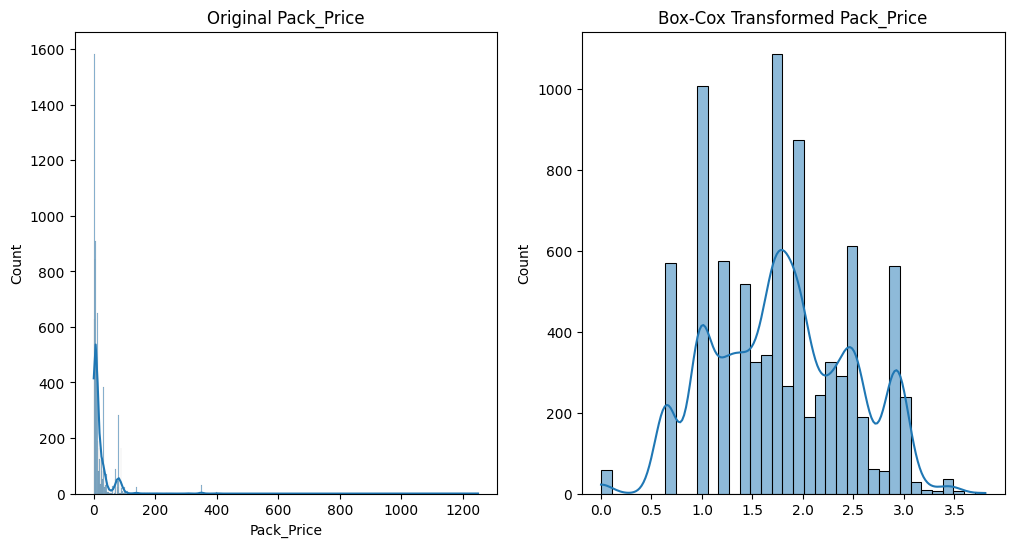

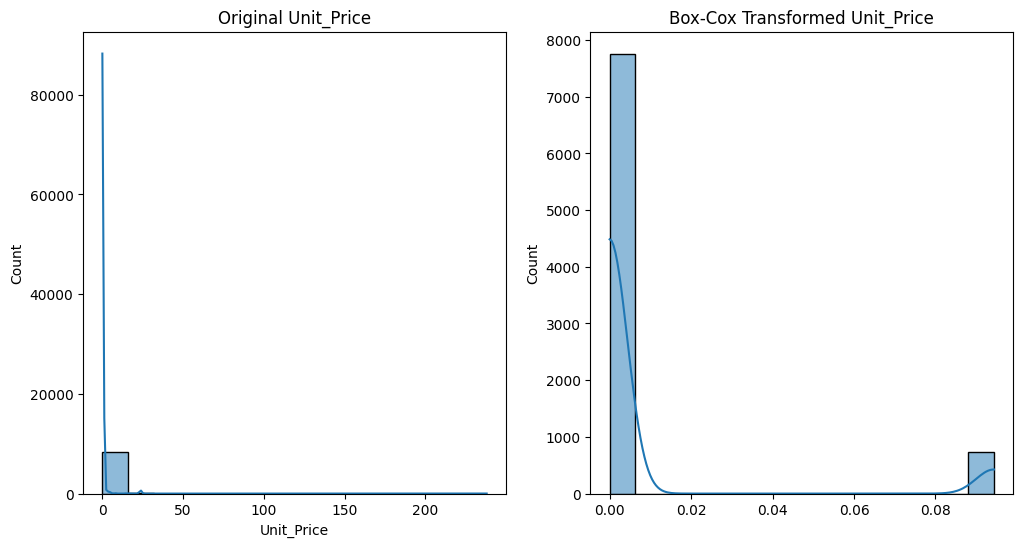

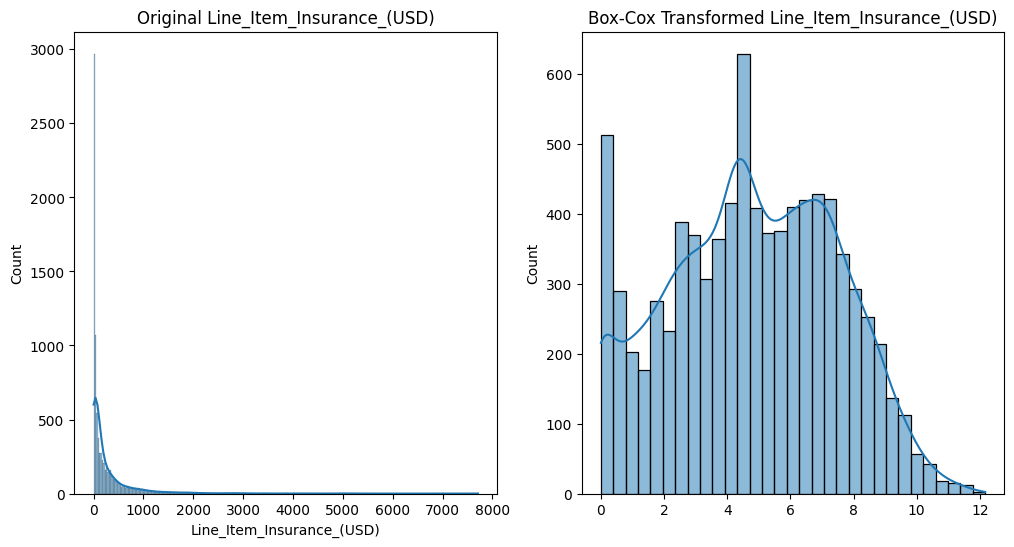

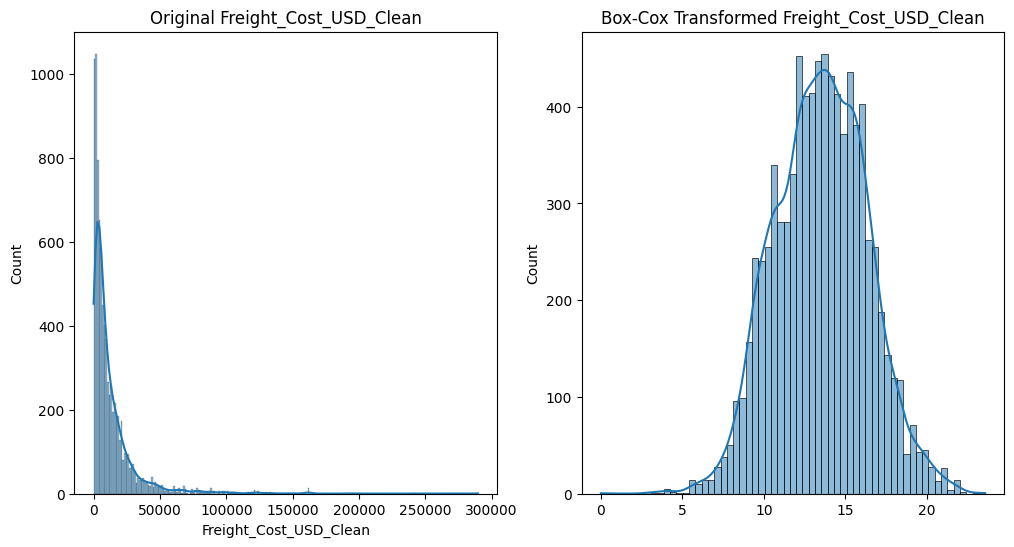

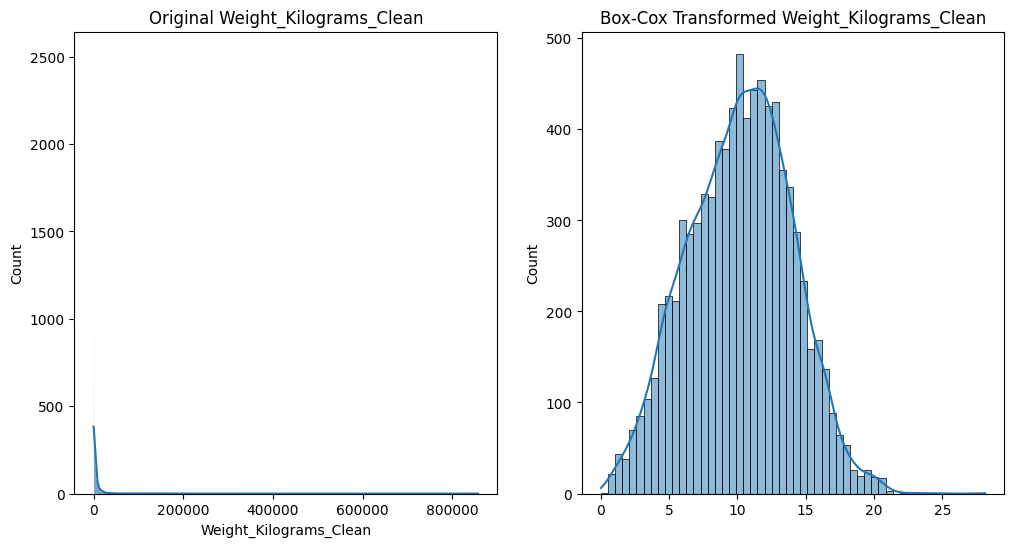

In [44]:
df, lambda_values =boxcox_transform(df, column_list=numerical_columns)

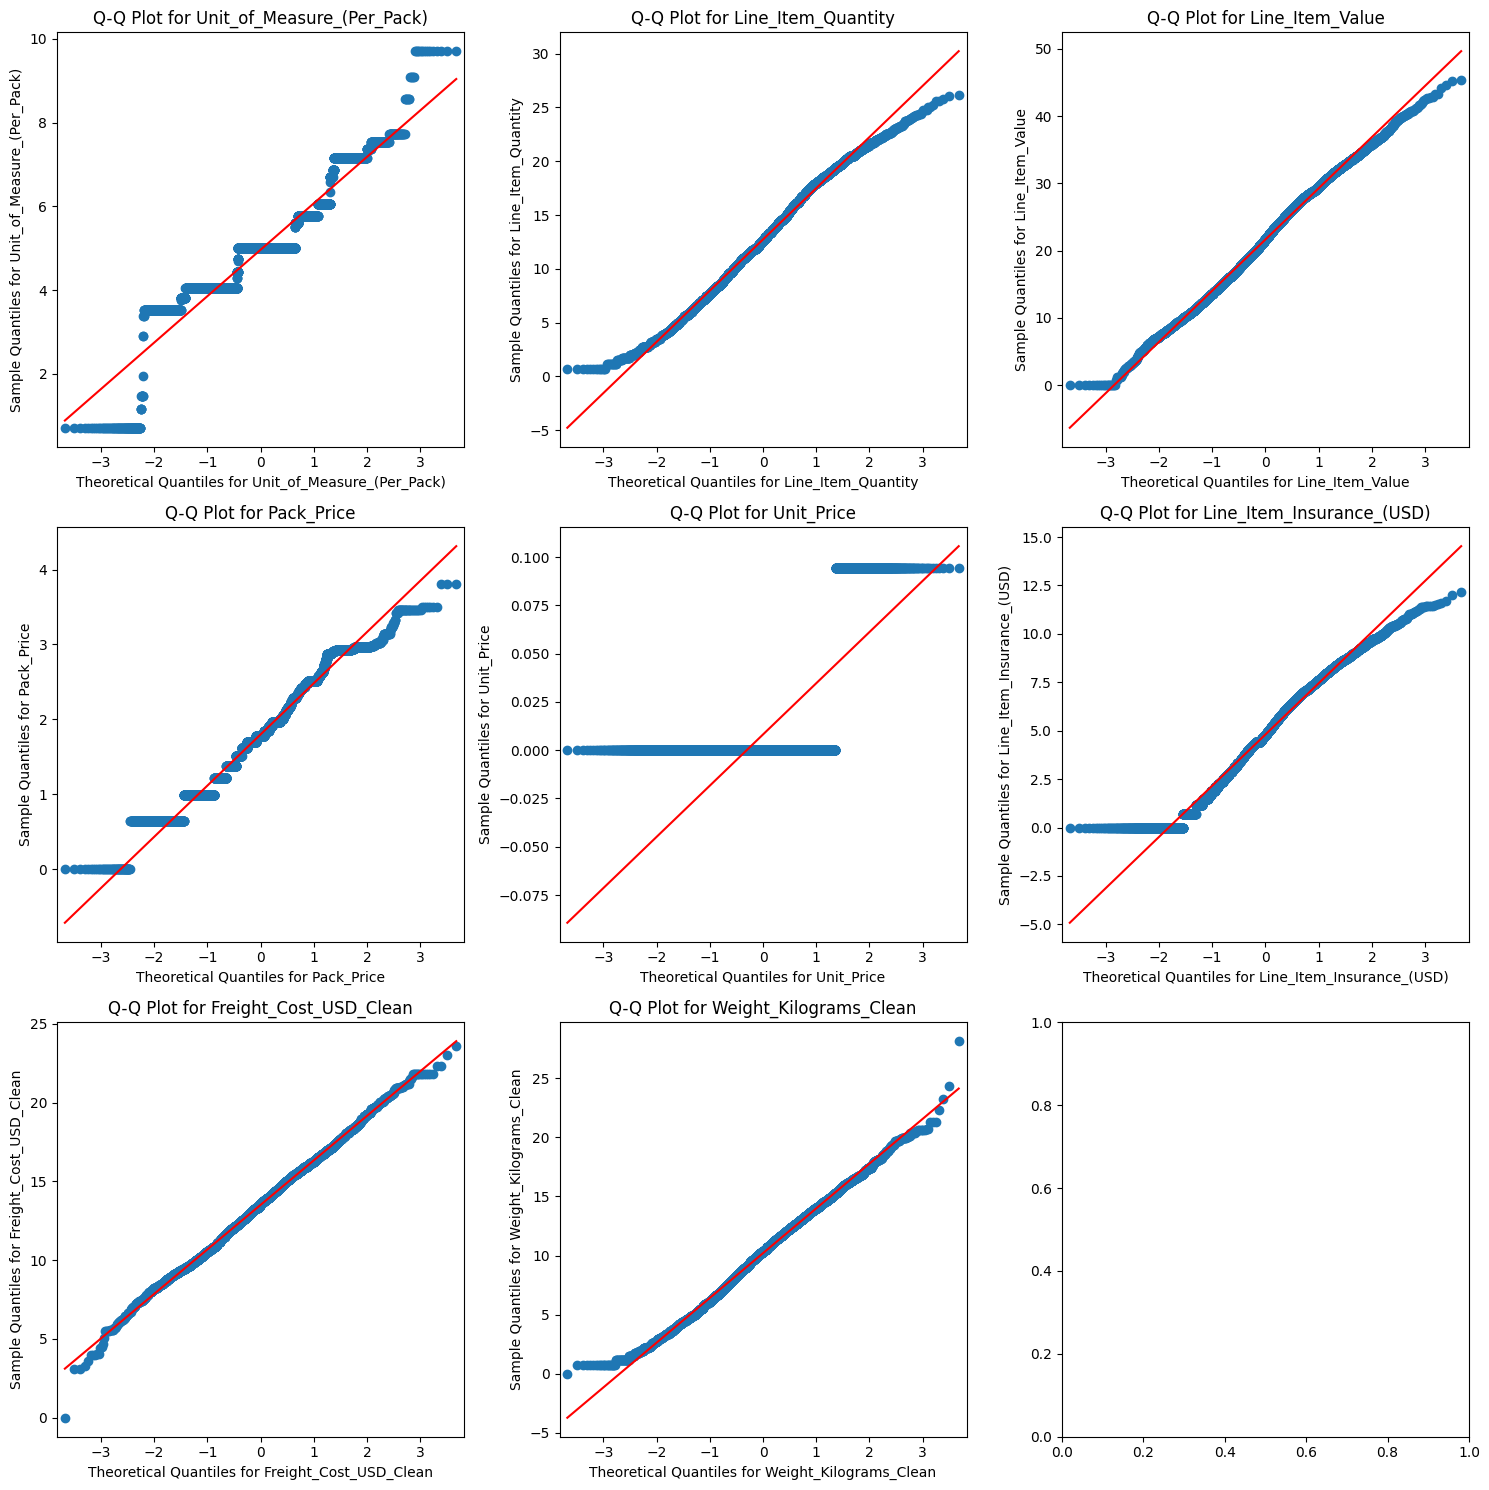

In [45]:
plot_qq_plots(dataframe=df, column_labels=numerical_columns)

In [46]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X is your feature matrix and y is your target variable
X = df.drop('Freight_Cost_USD_Clean', axis=1)  # Features (excluding the target column)
y = df['Freight_Cost_USD_Clean']  # Target variable



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Check the shapes of the resulting sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (7219, 59)
Training set - y shape: (7219,)
Testing set - X shape: (1274, 59)
Testing set - y shape: (1274,)


## Model Training

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import  SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [31]:
results = pd.DataFrame({'Score':['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})

In [32]:
regression_models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XG Boost": xgb.XGBRegressor(eval_metric='rmsle'),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Bagging": BaggingRegressor()
}

In [33]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [48]:
class RegressionModelEvaluator:
    def __init__(self, models, X_train, X_test, y_train, y_test):
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.results = pd.DataFrame({'Score': ['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})
        
    def train_and_evaluate(self):
        for model_name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            predictions = model.predict(self.X_test)

            mae = round(mean_absolute_error(self.y_test, predictions),2)
            rmse = round(mean_squared_error(self.y_test, predictions, squared=False),2)
            mse = round(mean_squared_error(self.y_test, predictions),2)
            r2 = round(r2_score(self.y_test, predictions),2)

            scores = [mae, rmse, mse, r2]
            self.results[model_name] = scores

    def get_results(self):
        return self.results


evaluator = RegressionModelEvaluator(models=regression_models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
evaluator.train_and_evaluate()
results_df = evaluator.get_results()
print(results_df)

                     Score  Decision Tree  Random Forest  Gradient Boosting  \
0      Mean Absolute Error           1.05           0.86               1.04   
1  Root Mean Squared Error           1.68           1.25               1.38   
2       Mean Squared Error           2.81           1.55               1.91   
3                 R Square           0.64           0.80               0.75   

   XG Boost  K-Nearest Neighbors  Bagging  
0      0.92                 1.13     0.89  
1      1.29                 1.54     1.28  
2      1.66                 2.36     1.64  
3      0.78                 0.69     0.79  


In [49]:
results_df

,Score,Decision Tree,Random Forest,Gradient Boosting,XG Boost,K-Nearest Neighbors,Bagging
0,Mean Absolute Error,1.05,0.86,1.04,0.92,1.13,0.89
1,Root Mean Squared Error,1.68,1.25,1.38,1.29,1.54,1.28
2,Mean Squared Error,2.81,1.55,1.91,1.66,2.36,1.64
3,R Square,0.64,0.80,0.75,0.78,0.69,0.79
